<a href="https://colab.research.google.com/github/kithmiGunawardna/Hate_Speech_detection/blob/master/Hate_Speech_Detection_balanced_dataset(undersampling)_classical_ML_approches_tf_idf(uni_gram)_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import relevant libraraies
import pandas as pd
import numpy as np
from google.colab import drive
import re
import nltk
nltk.download('stopwords')
nltk.download('snowball_data')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import stringfrom sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import resample
from sklearn.metrics import f1_score, recall_score, precision_score




 0 - hate speech 1 - offensive language 2 - neither

In [ ]:
#import dataset
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Campus_Research/labeled_data.csv')

NameError: name 'drive' is not defined

In [ ]:
#df['tweet'] = df['tweet'].str.lower()  #convert tweets to lowerclass letters

In [ ]:
# # removing the users from the tweets
# import re
# import re

# # Assuming df['tweet'] is a Pandas Series
# df['tweet'] = df['tweet'].apply(lambda x: re.sub('@[^\s]+', '', str(x)))




In [ ]:
df

In [ ]:
# import nltk

# from nltk.stem import PorterStemmer

# nltk.download('stopwords')

# from nltk.corpus import stopwords

In [ ]:
# stop_words = set(stopwords.words('english')) #to avoid similer ones we put thrm in to a set
# stemmer = PorterStemmer()

# def preprocess_text(text):
#     words = [stemmer.stem(word) for word in text.split() if not word.lower() in stop_words]
#     return ' '.join(words)

# df['processed_text'] = df['tweet'].apply(preprocess_text)

In [ ]:
# pattern = r'[^\w\s]'
# df['processed_text'] =df['processed_text'].replace(pattern, '', regex=True)

**cleaning part**

In [ ]:
stemmer = SnowballStemmer("english")
stopword = set(stopwords.words('english'))


def clean_text(text):
  """
  This function cleans text data by removing usernames, special characters, URLs, hashtags,
  lowercaseing text, removing stopwords, and applying stemming.

  Args:
      text: The text data to be cleaned.

  Returns:
      The cleaned text data.
  """

  # Remove usernames using regular expressions
  text = re.sub(r"@\w+", "", text)  # Username pattern

  # Lowercase text
  text = str(text).lower()

  # Remove special characters, URLs, hashtags
  text = re.sub(r"\[.*?\]|https?://\S+|www\.\S+|\s+#\S+", "", text)

  # Remove punctuation
  text = re.sub(r"[%s]" % re.escape(string.punctuation), "", text)

  # Remove newline characters
  text = re.sub("\n", "", text)

  # Remove words containing numbers (e.g., "RT123")
  text = re.sub(r"\w*\d\w*", "", text)

  # Split text into words after removing stopwords
  words = [word for word in text.split() if word not in stopword]

  # Apply stemming to each word
  stemmed_words = [stemmer.stem(word) for word in words]

  # Join stemmed words back into text
  cleaned_text = " ".join(stemmed_words)

  return cleaned_text





In [ ]:
# Apply clean_text function
df.loc[:, 'tweet'] = df['tweet'].apply(clean_text)

In [ ]:
df

In [ ]:
df1 =df[['class', 'tweet']]
df1


 **Imbalanced dataset**

In [ ]:
# Data
category = ['Hate Speech (0)', 'Offensive Language (1)', 'Neither (2)']
count = df['class'].value_counts()
value_count = [count[0], count[1], count[2]]

# Define a purple color palette for the bar plot
bar_colors = ['mediumorchid', 'plum', 'rebeccapurple']  # Purple shades

# Create a bar chart with Seaborn
# Customize the plot
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Visualization of Dataset')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
for bar in sns.barplot(x=category, y=value_count, palette=bar_colors).patches:
  plt.annotate(int(bar.get_height()),
              (bar.get_x() + bar.get_width() / 2, bar.get_height()),
              ha='center', va='bottom')

In [ ]:
blue_palette = sns.color_palette("Blues", n_colors=3)  # Customize 'n_colors' based on the number of slices

# Create a pie chart with the blue color palette
plt.pie(
    df['class'].value_counts().values,  # Values for the pie chart
    labels=df['class'].value_counts().index,  # Labels for each slice
    autopct='%1.1f%%',  # Display the percentage with one decimal place
    colors=blue_palette  # Set the color palette to shades of blue
)

# Display the pie chart
plt.show()

In [ ]:
df['class'].value_counts()

**Balanced dataset using undersampling**

In [ ]:
#create two different dataframe of majority and minority class
df_class_1 = df[(df['class']==1)]
df_class_2 = df[(df['class']==2)]
df_class_0 = df[(df['class']==0)]
# undersample class_1 class
df_class_1_undersampled = resample(df_class_1,
                                 replace=False,    # sample with replacement
                                 n_samples= len(df_class_0), # to match majority class
                                 random_state=42)  # reproducible results
# undersample class_1 class
df_class_2_undersampled = resample(df_class_2,
                                 replace=False,    # sample with replacement
                                 n_samples= len(df_class_0), # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
undersampled_df  = pd.concat([df_class_1_undersampled, df_class_2_undersampled,df_class_0])


In [ ]:
undersampled_df

In [ ]:
undersampled_df ['class'].value_counts()

In [ ]:
# Data
category = ['Hate Speech (0)', 'Offensive Language (1)', 'Neither (2)']
count = undersampled_df['class'].value_counts()
value_count = [count[0], count[1], count[2]]

# Define a purple color palette for the bar plot
bar_colors = ['limegreen', 'forestgreen', 'seagreen']  # Purple shades

# Create a bar chart with Seaborn
# Customize the plot
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Visualization of Dataset')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
for bar in sns.barplot(x=category, y=value_count, palette=bar_colors).patches:
  plt.annotate(int(bar.get_height()),
              (bar.get_x() + bar.get_width() / 2, bar.get_height()),
              ha='center', va='bottom')

In [ ]:
y = undersampled_df['class']
x = undersampled_df.tweet

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


***using bag of word uni gram method traing the models:***
     



In [ ]:
vectorizer = TfidfVectorizer()
x_train_vectorizer  = vectorizer.fit_transform(x_train)
vectorizer.get_feature_names_out()
x_test_vectorizer = vectorizer.transform(x_test)

***SVM model***

In [ ]:
parameters_SVM = {'kernel':('linear', 'rbf','poly','sigmoid'), 'C':[1, 10] ,'gamma':('scale','float','auto')}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters_SVM)
clf.fit(x_train_vectorizer,y_train)



In [ ]:
print(clf.cv_results_)



In [ ]:
df_svc = pd.DataFrame(clf.cv_results_)


In [ ]:
df_svc

In [ ]:
df_svc[['param_C', 'param_kernel', 'params', 'mean_test_score', 'rank_test_score']]


In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)

In [ ]:
SVM_output = clf.predict(x_test_vectorizer)

In [ ]:
y_true = y_test
y_pred = SVM_output
cm_for_SVM = confusion_matrix(y_true, y_pred)
sns.heatmap(data=cm_for_SVM, annot=True)


In [ ]:
print(classification_report(y_true, y_pred ,labels=[0,1,2]))

In [ ]:
f1 = f1_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')

print(f1)
print(recall)
print(precision)

***Logistic Regression model***  

In [ ]:
parameters_Logistic_regression = {'solver':('lbfgs', 'liblinear','newton-cg') ,'C':[1.0,10.0],'penalty':('l1','l2','elasticnet')}
Logistic_Regression = LogisticRegression()
model = GridSearchCV(Logistic_Regression,parameters_Logistic_regression)
model.fit(x_train_vectorizer,y_train)


In [ ]:
print(model.cv_results_)

{'mean_fit_time': array([9.68408585e-04, 2.40750313e-02, 1.11069679e-03, 5.83387995e-01,
       3.24664593e-02, 1.67457247e-01, 1.79481506e-03, 1.58967972e-03,
       1.22199059e-03, 1.25684738e-03, 5.94348431e-02, 8.88347626e-04,
       1.58711815e+00, 5.89276314e-02, 2.29305220e-01, 1.29733086e-03,
       1.24716759e-03, 1.22346878e-03]), 'std_fit_time': array([1.05635134e-04, 4.15139969e-03, 7.65213855e-05, 7.26043039e-02,
       4.53147055e-03, 5.72735791e-03, 5.24526748e-04, 4.41120367e-04,
       2.82694871e-05, 2.88994791e-05, 8.18950283e-03, 2.64191024e-05,
       8.44469183e-01, 2.97620870e-02, 1.69589749e-02, 1.09697899e-04,
       4.60366459e-05, 2.46541873e-05]), 'mean_score_time': array([0.        , 0.00087919, 0.        , 0.00131888, 0.00088935,
       0.00123715, 0.        , 0.        , 0.        , 0.        ,
       0.0007638 , 0.        , 0.00167985, 0.00078382, 0.00124378,
       0.        , 0.        , 0.        ]), 'std_score_time': array([0.00000000e+00, 1.21894128

In [ ]:
df_logistic_regression = pd.DataFrame(model.cv_results_)

In [ ]:
df_logistic_regression

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000968,0.000106,0.000000,0.000000,1.0,l1,lbfgs,"{'C': 1.0, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,0.024075,0.004151,0.000879,0.000122,1.0,l1,liblinear,"{'C': 1.0, 'penalty': 'l1', 'solver': 'libline...",0.823872,0.788937,0.810496,0.807580,0.790087,0.804195,0.013192,1
2,0.001111,0.000077,0.000000,0.000000,1.0,l1,newton-cg,"{'C': 1.0, 'penalty': 'l1', 'solver': 'newton-...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
3,0.583388,0.072604,0.001319,0.000050,1.0,l2,lbfgs,"{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.819505,0.797671,0.803207,0.793003,0.781341,0.798945,0.012552,3
4,0.032466,0.004531,0.000889,0.000138,1.0,l2,liblinear,"{'C': 1.0, 'penalty': 'l2', 'solver': 'libline...",0.820961,0.802038,0.809038,0.794461,0.776968,0.800693,0.014724,2
5,0.167457,0.005727,0.001237,0.000089,1.0,l2,newton-cg,"{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-...",0.819505,0.797671,0.803207,0.793003,0.781341,0.798945,0.012552,3
6,0.001795,0.000525,0.000000,0.000000,1.0,elasticnet,lbfgs,"{'C': 1.0, 'penalty': 'elasticnet', 'solver': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.001590,0.000441,0.000000,0.000000,1.0,elasticnet,liblinear,"{'C': 1.0, 'penalty': 'elasticnet', 'solver': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,0.001222,0.000028,0.000000,0.000000,1.0,elasticnet,newton-cg,"{'C': 1.0, 'penalty': 'elasticnet', 'solver': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
9,0.001257,0.000029,0.000000,0.000000,10.0,l1,lbfgs,"{'C': 10.0, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [ ]:
df_logistic_regression[['param_C'	,'param_penalty'	,'param_solver', 'params', 'mean_test_score', 'rank_test_score']]

,param_C,param_penalty,param_solver,params,mean_test_score,rank_test_score
0,1.0,l1,lbfgs,"{'C': 1.0, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,9
1,1.0,l1,liblinear,"{'C': 1.0, 'penalty': 'l1', 'solver': 'libline...",0.804195,1
2,1.0,l1,newton-cg,"{'C': 1.0, 'penalty': 'l1', 'solver': 'newton-...",NaN,9
3,1.0,l2,lbfgs,"{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}",0.798945,3
4,1.0,l2,liblinear,"{'C': 1.0, 'penalty': 'l2', 'solver': 'libline...",0.800693,2
5,1.0,l2,newton-cg,"{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-...",0.798945,3
6,1.0,elasticnet,lbfgs,"{'C': 1.0, 'penalty': 'elasticnet', 'solver': ...",NaN,9
7,1.0,elasticnet,liblinear,"{'C': 1.0, 'penalty': 'elasticnet', 'solver': ...",NaN,9
8,1.0,elasticnet,newton-cg,"{'C': 1.0, 'penalty': 'elasticnet', 'solver': ...",NaN,9
9,10.0,l1,lbfgs,"{'C': 10.0, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,9


In [ ]:
print(model.best_params_)
print(model.best_estimator_)

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(penalty='l1', solver='liblinear')


In [ ]:
logisticregresision_output = model.predict(x_test_vectorizer)


<Axes: >

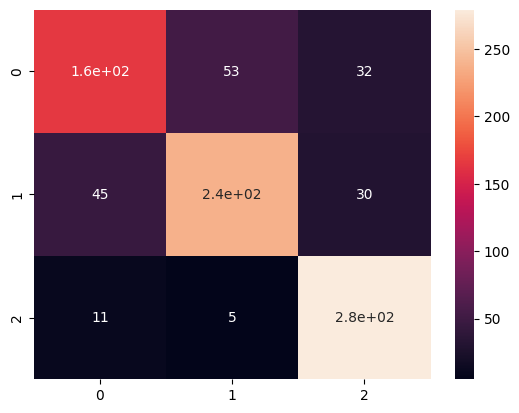

In [ ]:
y_true = y_test
y_pred = logisticregresision_output
cm_for_LogisticRegression = confusion_matrix(y_true, y_pred)
sns.heatmap(data=cm_for_LogisticRegression, annot=True)


In [ ]:
print(classification_report(y_true, logisticregresision_output,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70       250
           1       0.80      0.76      0.78       313
           2       0.82      0.95      0.88       295

    accuracy                           0.79       858
   macro avg       0.79      0.79      0.79       858
weighted avg       0.79      0.79      0.79       858



In [ ]:
f1 = f1_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')

print(f1)
print(recall)
print(precision)

0.7909366766278443
0.7948717948717948
0.7921726561689539


***Decision Tree Classifier***

In [ ]:
parameters_decision_tree_classifier = {'criterion':('gini', 'entropy','log_loss'), 'splitter':('best','random') ,'max_features':('sqrt','log2'),'max_depth' : [3,2,100,1000,10000],'min_samples_split':[2,20,30,40],'random_state':[0,42,123]}
Dession_tree_classifiar= DecisionTreeClassifier()
clf = GridSearchCV(Dession_tree_classifiar,parameters_decision_tree_classifier )
clf.fit(x_train_vectorizer,y_train)


In [ ]:
print(clf.cv_results_)

In [ ]:
df_dicision_tree = pd.DataFrame(clf.cv_results_)


In [ ]:
df_dicision_tree

In [ ]:
df_dicision_tree[['param_criterion', 'param_max_depth','param_max_features','param_min_samples_split','param_splitter', 'params', 'mean_test_score', 'rank_test_score']]

In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)

In [ ]:
decision_tree_output = clf.predict(x_test_vectorizer)

In [ ]:
y_true = y_test
y_pred =decision_tree_output
cm_for_decision_tree = confusion_matrix(y_true, y_pred)
sns.heatmap(data=cm_for_decision_tree, annot=True)

In [ ]:
print(classification_report(y_true, y_pred ,labels=[0,1,2]))

In [ ]:
f1 = f1_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')

print(f1)
print(recall)
print(precision)

***passive Aggressive***

In [ ]:
parameters_passive_aggrasive ={'C':[1.0,10.0],'max_iter':[10,100,1000],'early_stopping':(True,False),'shuffle':(True,False),'loss':('str','hinge'),'n_jobs':[1,10,100,1000],'random_state':[0,42,123]}
passive_aggrasive = PassiveAggressiveClassifier()
clf = GridSearchCV(passive_aggrasive,parameters_passive_aggrasive )
clf.fit(x_train_vectorizer,y_train)

GridSearchCV(estimator=PassiveAggressiveClassifier(),
             param_grid={'C': [1.0, 10.0], 'early_stopping': (True, False),
                         'loss': ('str', 'hinge'), 'max_iter': [10, 100, 1000],
                         'n_jobs': [1, 10, 100, 1000],
                         'random_state': [0, 42, 123],
                         'shuffle': (True, False)})

In [ ]:
print(clf.cv_results_)

{'mean_fit_time': array([8.70132446e-04, 7.91788101e-04, 7.92646408e-04, 8.07523727e-04,
       8.05664062e-04, 7.97510147e-04, 8.06808472e-04, 1.02605820e-03,
       9.50002670e-04, 9.65309143e-04, 9.51910019e-04, 9.68217850e-04,
       1.02086067e-03, 1.03492737e-03, 1.28130913e-03, 1.12109184e-03,
       1.14879608e-03, 1.21636391e-03, 9.74750519e-04, 1.01227760e-03,
       9.15813446e-04, 9.58490372e-04, 9.98878479e-04, 9.28020477e-04,
       1.01618767e-03, 1.45287514e-03, 1.41110420e-03, 1.00255013e-03,
       1.00240707e-03, 1.11713409e-03, 9.96351242e-04, 9.78660583e-04,
       9.80901718e-04, 1.03096962e-03, 1.00865364e-03, 1.01680756e-03,
       9.68456268e-04, 9.69171524e-04, 9.63973999e-04, 8.12768936e-04,
       8.26168060e-04, 8.09335709e-04, 8.10766220e-04, 8.62836838e-04,
       1.22795105e-03, 1.20286942e-03, 1.11684799e-03, 8.14962387e-04,
       8.04710388e-04, 8.00228119e-04, 7.88211823e-04, 7.97939301e-04,
       8.05616379e-04, 8.21113586e-04, 7.92121887e-04, 7.88

In [ ]:
df_passive_aggrasive = pd.DataFrame(clf.cv_results_)


In [ ]:
df_passive_aggrasive

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_early_stopping,param_loss,param_max_iter,param_n_jobs,param_random_state,param_shuffle,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000870,0.000095,0.000000,0.000000,1.0,True,str,10,1,0,True,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,289
1,0.000792,0.000007,0.000000,0.000000,1.0,True,str,10,1,0,False,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,289
2,0.000793,0.000012,0.000000,0.000000,1.0,True,str,10,1,42,True,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,289
3,0.000808,0.000042,0.000000,0.000000,1.0,True,str,10,1,42,False,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,289
4,0.000806,0.000037,0.000000,0.000000,1.0,True,str,10,1,123,True,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,0.355927,0.017762,0.020306,0.012132,10.0,False,hinge,1000,1000,0,False,"{'C': 10.0, 'early_stopping': False, 'loss': '...",0.726346,0.704512,0.721574,0.720117,0.692420,0.712994,0.012632,265
572,0.642397,0.698255,0.004434,0.003475,10.0,False,hinge,1000,1000,42,True,"{'C': 10.0, 'early_stopping': False, 'loss': '...",0.724891,0.714702,0.717201,0.714286,0.714286,0.717073,0.004057,257
573,0.318876,0.052880,0.012428,0.011608,10.0,False,hinge,1000,1000,42,False,"{'C': 10.0, 'early_stopping': False, 'loss': '...",0.726346,0.704512,0.721574,0.720117,0.692420,0.712994,0.012632,265
574,0.329273,0.069243,0.001727,0.000606,10.0,False,hinge,1000,1000,123,True,"{'C': 10.0, 'early_stopping': False, 'loss': '...",0.755459,0.726346,0.727405,0.723032,0.725948,0.731638,0.011998,201


In [ ]:
df_passive_aggrasive[['param_C', 'param_early_stopping','param_loss','param_max_iter','param_n_jobs','param_random_state'	,'param_shuffle', 'params', 'mean_test_score', 'rank_test_score']]

,param_C,param_early_stopping,param_loss,param_max_iter,param_n_jobs,param_random_state,param_shuffle,params,mean_test_score,rank_test_score
0,1.0,True,str,10,1,0,True,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,289
1,1.0,True,str,10,1,0,False,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,289
2,1.0,True,str,10,1,42,True,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,289
3,1.0,True,str,10,1,42,False,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,289
4,1.0,True,str,10,1,123,True,"{'C': 1.0, 'early_stopping': True, 'loss': 'st...",NaN,289
...,...,...,...,...,...,...,...,...,...,...
571,10.0,False,hinge,1000,1000,0,False,"{'C': 10.0, 'early_stopping': False, 'loss': '...",0.712994,265
572,10.0,False,hinge,1000,1000,42,True,"{'C': 10.0, 'early_stopping': False, 'loss': '...",0.717073,257
573,10.0,False,hinge,1000,1000,42,False,"{'C': 10.0, 'early_stopping': False, 'loss': '...",0.712994,265
574,10.0,False,hinge,1000,1000,123,True,"{'C': 10.0, 'early_stopping': False, 'loss': '...",0.731638,201


In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)

{'C': 10.0, 'early_stopping': True, 'loss': 'hinge', 'max_iter': 100, 'n_jobs': 1, 'random_state': 0, 'shuffle': True}
PassiveAggressiveClassifier(C=10.0, early_stopping=True, max_iter=100, n_jobs=1,
                            random_state=0)


In [ ]:
passive_aggressive_output = clf.predict(x_test_vectorizer)

<Axes: >

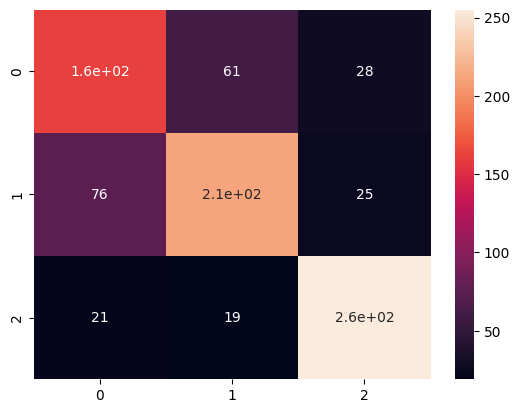

In [ ]:
y_true = y_test
y_pred = passive_aggressive_output
cm_for_passive_aggressive_output = confusion_matrix(y_true, y_pred)
sns.heatmap(data=cm_for_passive_aggressive_output, annot=True)

In [ ]:
print(classification_report(y_true,passive_aggressive_output,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       250
           1       0.73      0.68      0.70       313
           2       0.83      0.86      0.85       295

    accuracy                           0.73       858
   macro avg       0.73      0.73      0.73       858
weighted avg       0.73      0.73      0.73       858



In [ ]:
f1 = f1_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')

print(f1)
print(recall)
print(precision)

0.731148872001484
0.7319347319347319
0.7313418884236168


***Naive Bayes***

In [ ]:
parameters_Naive_Bayes ={'alpha':[1.0,10.0,100.0,1000],'fit_prior':(True,False),'class_prior':[[0.2, 0.5,0.9]]}
Naive_Bayes = MultinomialNB()
clf = GridSearchCV(estimator=Naive_Bayes, param_grid=parameters_Naive_Bayes )
# Fit the model using dense data
clf.fit( x_train_vectorizer, y_train)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [1.0, 10.0, 100.0, 1000],
                         'class_prior': [[0.2, 0.5, 0.9]],
                         'fit_prior': (True, False)})

In [ ]:
print(clf.cv_results_)

{'mean_fit_time': array([0.00463419, 0.00385947, 0.00361686, 0.00356631, 0.00355473,
       0.00364914, 0.00360627, 0.00364289]), 'std_fit_time': array([1.39164139e-03, 2.87669317e-04, 1.27471104e-04, 3.25395158e-05,
       6.58909935e-05, 1.54509338e-04, 4.88113117e-05, 6.92441768e-05]), 'mean_score_time': array([0.00176497, 0.00109625, 0.00109005, 0.00108681, 0.00106721,
       0.00115647, 0.00109749, 0.00107994]), 'std_score_time': array([6.69062983e-04, 2.80544823e-05, 2.37156388e-05, 2.80267505e-05,
       2.06043317e-05, 1.15664969e-04, 5.80826807e-05, 1.06331479e-05]), 'param_alpha': masked_array(data=[1.0, 1.0, 10.0, 10.0, 100.0, 100.0, 1000, 1000],
             mask=[False, False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_class_prior': masked_array(data=[list([0.2, 0.5, 0.9]), list([0.2, 0.5, 0.9]),
                   list([0.2, 0.5, 0.9]), list([0.2, 0.5, 0.9]),
                   list([0.2, 0.5, 0.9]), list([0.2, 0.5,

In [ ]:
df_navie_bayes = pd.DataFrame(clf.cv_results_)

In [ ]:
df_navie_bayes

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_class_prior,param_fit_prior,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004634,0.001392,0.001765,0.000669,1.0,"[0.2, 0.5, 0.9]",True,"{'alpha': 1.0, 'class_prior': [0.2, 0.5, 0.9],...",0.748180,0.762737,0.778426,0.763848,0.733236,0.757285,0.015369,1
1,0.003859,0.000288,0.001096,0.000028,1.0,"[0.2, 0.5, 0.9]",False,"{'alpha': 1.0, 'class_prior': [0.2, 0.5, 0.9],...",0.748180,0.762737,0.778426,0.763848,0.733236,0.757285,0.015369,1
2,0.003617,0.000127,0.001090,0.000024,10.0,"[0.2, 0.5, 0.9]",True,"{'alpha': 10.0, 'class_prior': [0.2, 0.5, 0.9]...",0.737991,0.745269,0.768222,0.730321,0.728863,0.742133,0.014305,3
3,0.003566,0.000033,0.001087,0.000028,10.0,"[0.2, 0.5, 0.9]",False,"{'alpha': 10.0, 'class_prior': [0.2, 0.5, 0.9]...",0.737991,0.745269,0.768222,0.730321,0.728863,0.742133,0.014305,3
4,0.003555,0.000066,0.001067,0.000021,100.0,"[0.2, 0.5, 0.9]",True,"{'alpha': 100.0, 'class_prior': [0.2, 0.5, 0.9...",0.605531,0.614265,0.618076,0.610787,0.609329,0.611598,0.004282,5
5,0.003649,0.000155,0.001156,0.000116,100.0,"[0.2, 0.5, 0.9]",False,"{'alpha': 100.0, 'class_prior': [0.2, 0.5, 0.9...",0.605531,0.614265,0.618076,0.610787,0.609329,0.611598,0.004282,5
6,0.003606,0.000049,0.001097,0.000058,1000,"[0.2, 0.5, 0.9]",True,"{'alpha': 1000, 'class_prior': [0.2, 0.5, 0.9]...",0.349345,0.350801,0.354227,0.354227,0.358601,0.353440,0.003213,7
7,0.003643,0.000069,0.001080,0.000011,1000,"[0.2, 0.5, 0.9]",False,"{'alpha': 1000, 'class_prior': [0.2, 0.5, 0.9]...",0.349345,0.350801,0.354227,0.354227,0.358601,0.353440,0.003213,7


In [ ]:
df_navie_bayes[['param_alpha'	,'param_class_prior','param_fit_prior'	, 'params', 'mean_test_score', 'rank_test_score']]

,param_alpha,param_class_prior,param_fit_prior,params,mean_test_score,rank_test_score
0,1.0,"[0.2, 0.5, 0.9]",True,"{'alpha': 1.0, 'class_prior': [0.2, 0.5, 0.9],...",0.757285,1
1,1.0,"[0.2, 0.5, 0.9]",False,"{'alpha': 1.0, 'class_prior': [0.2, 0.5, 0.9],...",0.757285,1
2,10.0,"[0.2, 0.5, 0.9]",True,"{'alpha': 10.0, 'class_prior': [0.2, 0.5, 0.9]...",0.742133,3
3,10.0,"[0.2, 0.5, 0.9]",False,"{'alpha': 10.0, 'class_prior': [0.2, 0.5, 0.9]...",0.742133,3
4,100.0,"[0.2, 0.5, 0.9]",True,"{'alpha': 100.0, 'class_prior': [0.2, 0.5, 0.9...",0.611598,5
5,100.0,"[0.2, 0.5, 0.9]",False,"{'alpha': 100.0, 'class_prior': [0.2, 0.5, 0.9...",0.611598,5
6,1000,"[0.2, 0.5, 0.9]",True,"{'alpha': 1000, 'class_prior': [0.2, 0.5, 0.9]...",0.353440,7
7,1000,"[0.2, 0.5, 0.9]",False,"{'alpha': 1000, 'class_prior': [0.2, 0.5, 0.9]...",0.353440,7


In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)

{'alpha': 1.0, 'class_prior': [0.2, 0.5, 0.9], 'fit_prior': True}
MultinomialNB(class_prior=[0.2, 0.5, 0.9])


In [ ]:
naive_bayes_output = clf.predict(x_test_vectorizer)

<Axes: >

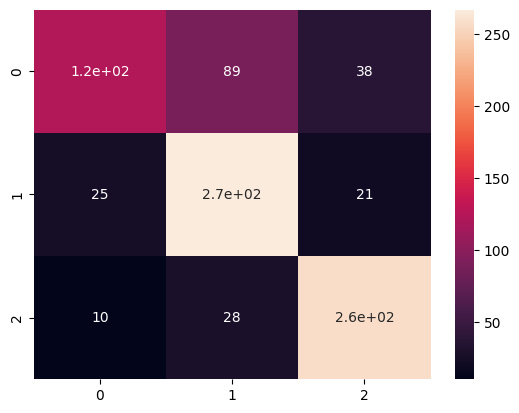

In [ ]:
y_true = y_test
y_pred = naive_bayes_output
cm_for_naive_bayes_output = confusion_matrix(y_true, y_pred)
sns.heatmap(data=cm_for_naive_bayes_output, annot=True)

In [ ]:
print(classification_report(y_true,naive_bayes_output,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.78      0.49      0.60       250
           1       0.70      0.85      0.77       313
           2       0.81      0.87      0.84       295

    accuracy                           0.75       858
   macro avg       0.76      0.74      0.74       858
weighted avg       0.76      0.75      0.74       858



In [ ]:
f1 = f1_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')

print(f1)
print(recall)
print(precision)

0.7444105386590951
0.754079254079254
0.7601095008630611


***KNN model***

In [ ]:
parameters_KNN = {'n_neighbors' : [2,3,5], 'algorithm' : ('ball_tree', 'kd_tree'), 'leaf_size' : [10,30 ,50], 'p':[1,2,3] ,'n_jobs' : [10,100,1000] }
KNN = KNeighborsClassifier()
neigh =GridSearchCV(KNN , parameters_KNN )
neigh.fit(x_train_vectorizer,y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('ball_tree', 'kd_tree'),
                         'leaf_size': [10, 30, 50], 'n_jobs': [10, 100, 1000],
                         'n_neighbors': [2, 3, 5], 'p': [1, 2, 3]})

In [ ]:
print(neigh.cv_results_)

{'mean_fit_time': array([0.00218778, 0.00192575, 0.00136356, 0.0016798 , 0.00187011,
       0.00148158, 0.00189562, 0.00192852, 0.00140691, 0.00159478,
       0.0017437 , 0.00145946, 0.00162992, 0.00167999, 0.00226064,
       0.0051681 , 0.00231657, 0.00135775, 0.00181408, 0.00259295,
       0.00169654, 0.00276828, 0.00221949, 0.00247226, 0.00785246,
       0.00332637, 0.00205421, 0.00208726, 0.00174694, 0.00132804,
       0.00176458, 0.0017168 , 0.00215406, 0.0017777 , 0.00173984,
       0.00135689, 0.00189934, 0.0023767 , 0.00189404, 0.00202193,
       0.00172348, 0.00143838, 0.0016396 , 0.00165758, 0.0013237 ,
       0.00363164, 0.00294809, 0.00378036, 0.00218358, 0.00309081,
       0.00252762, 0.00235949, 0.00199027, 0.00282621, 0.00363173,
       0.00223794, 0.0017858 , 0.00228157, 0.00257282, 0.00132689,
       0.00166626, 0.00173721, 0.00136638, 0.00162606, 0.00189233,
       0.00134573, 0.00167856, 0.00167079, 0.00201364, 0.00178642,
       0.00189962, 0.0019134 , 0.00204654, 0

In [ ]:
df_KNN = pd.DataFrame(neigh.cv_results_)

In [ ]:
df_KNN

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_jobs,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002188,0.000491,0.186778,0.018293,ball_tree,10,10,2,1,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.548763,0.496361,0.521866,0.505831,0.516035,0.517771,0.017783,91
1,0.001926,0.000494,0.089154,0.003407,ball_tree,10,10,2,2,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.548763,0.512373,0.521866,0.513120,0.533528,0.525930,0.013737,73
2,0.001364,0.000122,0.000000,0.000000,ball_tree,10,10,2,3,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,109
3,0.001680,0.000209,0.177838,0.006883,ball_tree,10,10,3,1,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.582242,0.612809,0.626822,0.620991,0.618076,0.612188,0.015643,19
4,0.001870,0.000402,0.089994,0.002874,ball_tree,10,10,3,2,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.601164,0.617176,0.629738,0.616618,0.615160,0.615971,0.009070,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.002325,0.000687,2.122914,0.176771,kd_tree,50,1000,3,2,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_j...",0.601164,0.617176,0.629738,0.616618,0.615160,0.615971,0.009070,1
158,0.002395,0.000191,0.000000,0.000000,kd_tree,50,1000,3,3,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_j...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,109
159,0.002381,0.000376,1.700763,0.073853,kd_tree,50,1000,5,1,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_j...",0.605531,0.608443,0.603499,0.590379,0.625364,0.606643,0.011219,37
160,0.005863,0.005837,2.129932,0.164191,kd_tree,50,1000,5,2,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_j...",0.608443,0.602620,0.597668,0.583090,0.634111,0.605186,0.016725,55


In [ ]:
df_KNN[['param_algorithm'	,'param_leaf_size',	'param_n_jobs'	,'param_n_neighbors'	,'param_p','params', 'mean_test_score', 'rank_test_score']]

,param_algorithm,param_leaf_size,param_n_jobs,param_n_neighbors,param_p,params,mean_test_score,rank_test_score
0,ball_tree,10,10,2,1,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.517771,91
1,ball_tree,10,10,2,2,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.525930,73
2,ball_tree,10,10,2,3,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",NaN,109
3,ball_tree,10,10,3,1,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.612188,19
4,ball_tree,10,10,3,2,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'n...",0.615971,1
...,...,...,...,...,...,...,...,...
157,kd_tree,50,1000,3,2,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_j...",0.615971,1
158,kd_tree,50,1000,3,3,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_j...",NaN,109
159,kd_tree,50,1000,5,1,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_j...",0.606643,37
160,kd_tree,50,1000,5,2,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_j...",0.605186,55


In [ ]:
print(neigh.best_params_)
print(neigh.best_estimator_)

{'algorithm': 'ball_tree', 'leaf_size': 10, 'n_jobs': 10, 'n_neighbors': 3, 'p': 2}
KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, n_jobs=10,
                     n_neighbors=3)


In [ ]:
KNN_output = neigh.predict(x_test_vectorizer)

<Axes: >

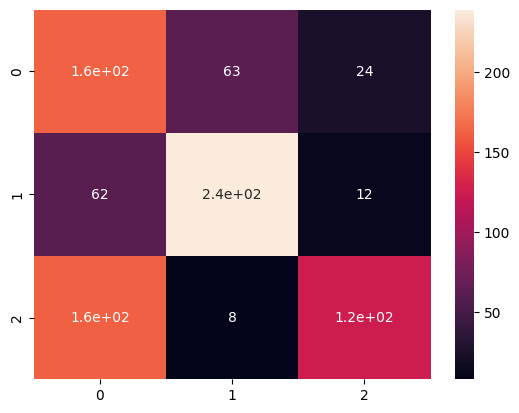

In [ ]:
y_true = y_test
y_pred = KNN_output
cm_for_KNN_output = confusion_matrix(y_true, y_pred)
sns.heatmap(data=cm_for_KNN_output, annot=True)

In [ ]:
print(classification_report(y_true,KNN_output,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.42      0.65      0.51       250
           1       0.77      0.76      0.77       313
           2       0.78      0.42      0.55       295

    accuracy                           0.61       858
   macro avg       0.66      0.61      0.61       858
weighted avg       0.67      0.61      0.62       858



In [ ]:
f1 = f1_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')

print(f1)
print(recall)
print(precision)

0.617513780946076
0.6142191142191142
0.67091763161922


***Random Forest***

In [ ]:
parameters_Random_forest ={'max_depth': [3,2,10,100,1000], 'random_state' : [0,42,123] ,'n_estimators' :[10,100,1000], 'criterion' : ('gini', 'entropy', 'log_loss') ,'min_samples_split': [2,20,30,40] , 'max_features': ('sqrt','log2',None),'bootstrap':(True,False),'n_jobs':[10,100,1000]}
Random_Forest = RandomForestClassifier()
clf =GridSearchCV(Random_Forest,parameters_Random_forest )
clf.fit(x_train_vectorizer,y_train)

In [ ]:
print(clf.cv_results_)

In [ ]:
df_Random_Forest = pd.DataFrame(clf.cv_results_)

In [ ]:
df_Random_Forest

In [ ]:
df_Random_Forest[['params', 'mean_test_score', 'rank_test_score']]

In [ ]:
print(clf.best_params_)
print(clf.best_estimator_)

In [ ]:
Random_forest_output = clf.predict(x_test_vectorizer)

In [ ]:
y_true = y_test
y_pred =Random_forest_output
cm_for_Random_forest = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_Random_forest, annot=True)

In [ ]:
print(classification_report(y_true,Random_forest_output,labels=[0,1,2]))